# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### Respuestas Seccion 1
Por supuesto  que si, el mercado inmobiliario se rige por oferta y demanda, por lo que hoy en dia la empresas que se dedican a la compra-venta de inmuebles estan exhaustivamente en busca de ofertas para comprar y luego vender. El objetivo es "comprar barato y vender caro", con un buen algoritmo de machine learning se puede reducir muchisimo el trabajo de busqueda de propiedades, concentrandose bien de lleno en el negocio.

Para llegar a eso se necesitan de los siguientes datos:
* Terreno: se necesita saber de cuantos metros cuadrados es el terreno en donde esta el inmueble y sobre todo cuantos metros cubre dicho inmueble. Este es un dato clave para ver el precio en una propiedad.
* Ubicacion: no es lo mismo si compro un monoambiente en Villa Allende, Cordoba que si lo compro en Puerto Madero, Buenos Aires. Ubicaciones mas famosas y ostentosas llevan a un precio mayor. 
* Tipo de propiedad: Si es una Casa, un departamento, un galpon. Los tipos de comodidades influyen tambien.
* Cantidad de ambientes: mas ambientes, mas caro.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')



In [3]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
print('La cantidad de filas del dataset son: ' + str(df.shape[0]) + ', y la cantidad de columnas son: ' + str(df.shape[1]) + '.')

La cantidad de filas del dataset son: 146660, y la cantidad de columnas son: 19.


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
# hago una mascara creando una variable llamada datafalse, cuando hago datafalse.sum me da los nombres de la columna y cuantas variables faltan
datafalse=df.isnull()
print(datafalse.sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


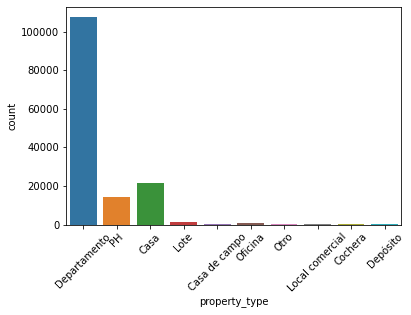

In [6]:
#Utilizo la funcion value counts preseleccionando la columna que quiero analizar 
#Utilizo la funcion set_xticklabels, utilizo get para llamarla y luego pongo que rote 45 grados, el ; se utiliza para que no me traiga informacion inncesaria del countplot
print(df['property_type'].value_counts())

dataproperty=df['property_type'].value_counts()
yr=sns.countplot(data = df, x = "property_type")
yr.set_xticklabels(yr.get_xticklabels(), rotation = 45);

El mayor numero de propiedades es del tipo de departamento

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


<AxesSubplot:xlabel='l2', ylabel='count'>

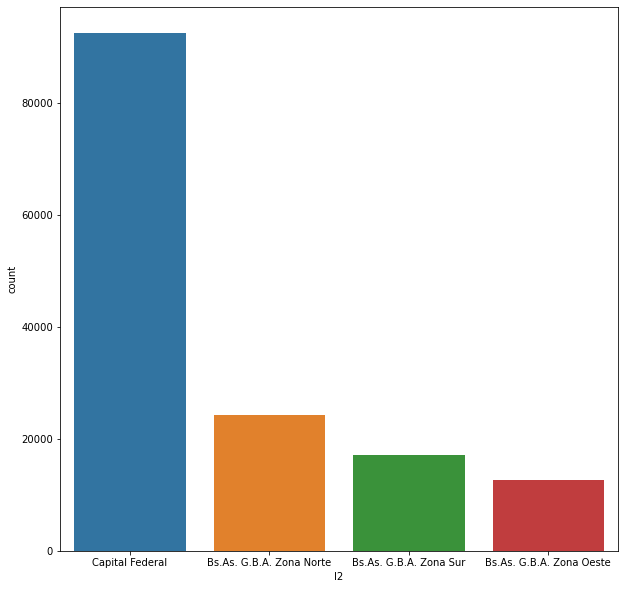

In [7]:
# print(df['l2'].value_counts())

print(df['l2'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'l2', order = df['l2'].value_counts().index)

El mayor numero de propiedades se encuentra en la Capital federal 


In [8]:

with pd.option_context("display.max_rows", 1000):
    print(df['l3'].value_counts())

Palermo                 13073
Tigre                    8718
Almagro                  7527
Belgrano                 6935
Caballito                6650
Villa Crespo             6494
Recoleta                 5917
La Plata                 4354
La Matanza               3757
Pilar                    3709
Lomas de Zamora          3599
Villa Urquiza            3339
Vicente López            3251
Tres de Febrero          3240
Barrio Norte             3229
Balvanera                2992
Flores                   2556
Morón                    2312
San Isidro               2265
Nuñez                    1978
Quilmes                  1853
Lanús                    1839
General San Martín       1796
Puerto Madero            1757
Colegiales               1599
San Cristobal            1537
San Miguel               1450
Villa Devoto             1437
Escobar                  1419
Avellaneda               1370
Villa del Parque         1361
Parque Centenario        1318
Almirante Brown          1228
Moreno    

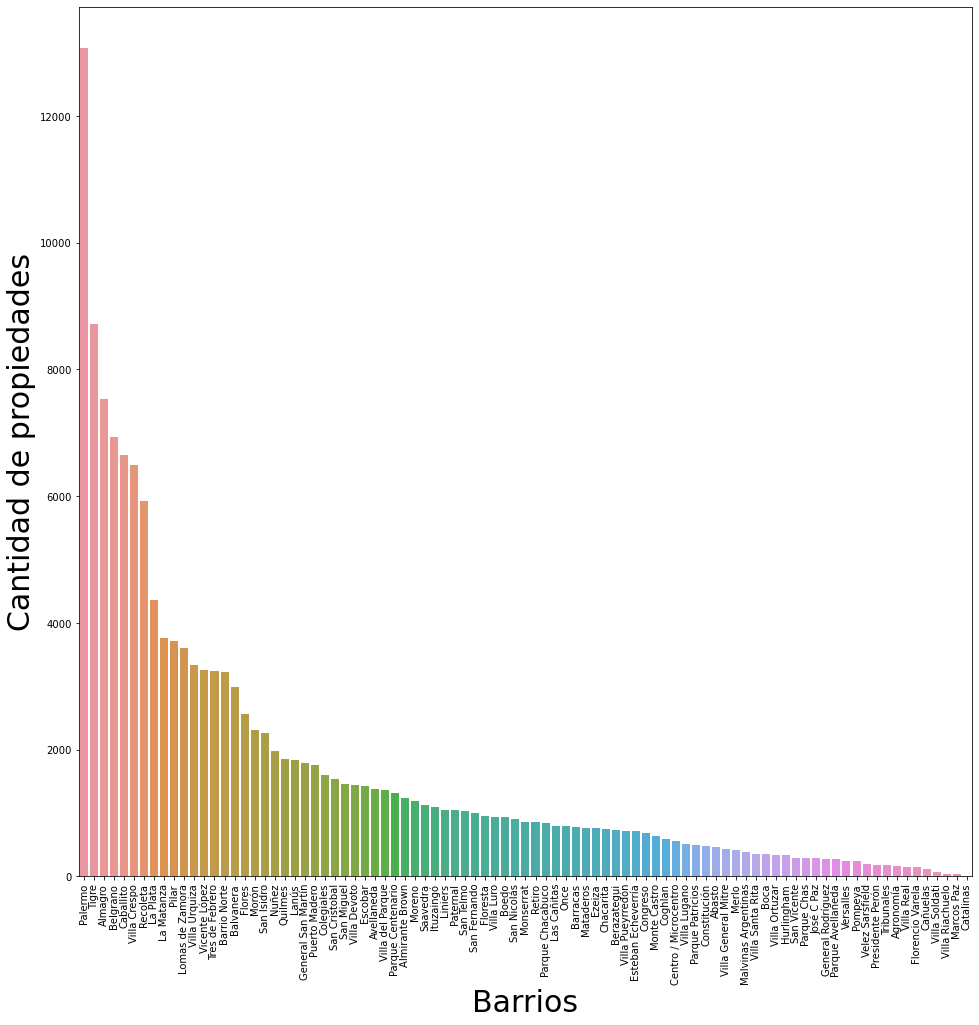

In [9]:
plt.figure(figsize=(16,16))
barrios = sns.countplot(data = df, x = 'l3', 
                        order = df['l3'].value_counts().index)
barrios.set_xlabel("Barrios",fontsize = 30)
barrios.set_ylabel("Cantidad de propiedades",fontsize = 30)
for i in barrios.get_xticklabels():
    i.set_rotation(90)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [10]:
#Utilizo las mascaras para generar una lista que me filtra las propiedades. 
#Luego agrego las mascaras 2 y 3 a la "mascara", para luego utilizarla para que me filtre por Capital Federal
mascara = df.loc[df['property_type'] == 'Departamento']
mascara2 = df.loc[df['property_type'] == 'PH']
mascara3 = df.loc[df['property_type'] == 'Casa']
mascara = mascara.append(mascara2)
mascara = mascara.append(mascara3)
mascara = mascara.loc[df['l2'] == 'Capital Federal']
dataset = mascara

In [11]:
mascara.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Aca esta la distribucion de las variables:

In [12]:
# A
print(mascara[['rooms','bedrooms','bathrooms','surface_total', 'surface_covered', 'price']].describe())

              rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     82250.000000  9.148500e+04  
mean         94.966310  2.595003e+05  
std         778.515243  3.222654e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          63.000000  1.750000e+05  
75%          96.000000  2.790000e+05  
max      126062.000000  3.243423e+07  


Aca esta la distribucion por tipo de propiedad:

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

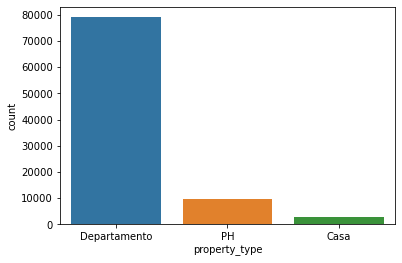

In [13]:
sns.countplot(mascara['property_type'])

Aca se puede ver la distribucion de la propiedades por cantidad de ambientes que posea cada propiedad:

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


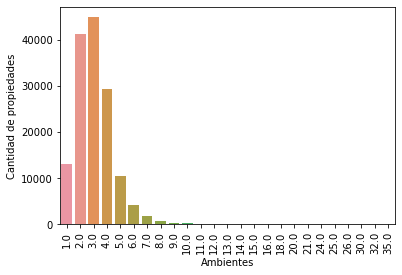

In [14]:
sns.countplot(mascara['rooms'])
grafico = sns.countplot(data = df, x = 'rooms')
grafico.set_xlabel("Ambientes")
grafico.set_ylabel("Cantidad de propiedades")
grafico.set_xticklabels(grafico.get_xticklabels(), rotation = 90);

Aca se muestra la distubucion de propiedades por cantidad de Cuartos. La mayoria de las propiedades del dataset tiene 1 cuarto

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


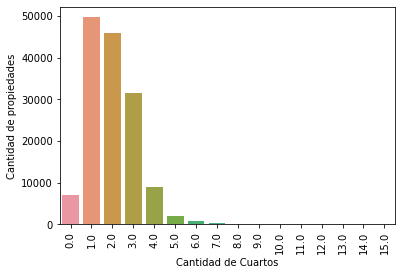

In [15]:
sns.countplot(mascara['bedrooms'])
grafico1 = sns.countplot(data = df, x = 'bedrooms')
grafico1.set_xlabel("Cantidad de Cuartos")
grafico1.set_ylabel("Cantidad de propiedades")
grafico1.set_xticklabels(grafico1.get_xticklabels(), rotation = 90);

Aca se muestra la distubucion de propiedades por cantidad de baños. La mayoria de las propiedades del dataset tiene 1 cuarto

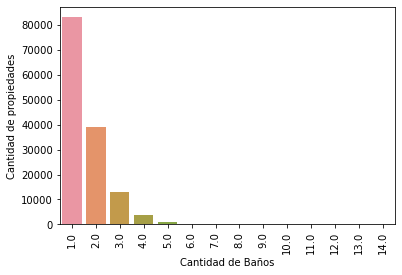

In [16]:
sns.countplot(x = mascara['bathrooms'])
grafico2 = sns.countplot(data = df, x = 'bathrooms')
grafico2.set_xlabel("Cantidad de Baños")
grafico2.set_ylabel("Cantidad de propiedades")
grafico2.set_xticklabels(grafico2.get_xticklabels(), rotation = 90);

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface_total'>

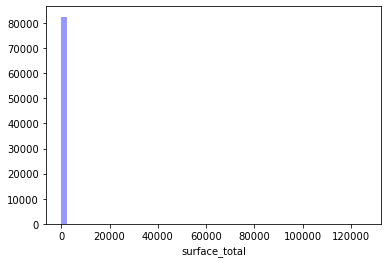

In [17]:
sns.distplot(mascara['surface_total'], kde = False, color = 'b')

<AxesSubplot:xlabel='surface_covered'>

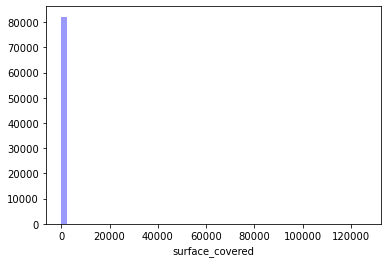

In [18]:
sns.distplot(mascara['surface_covered'], kde = False, color = 'b')

<AxesSubplot:xlabel='price'>

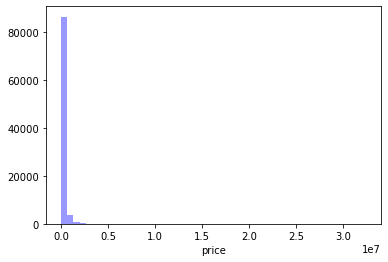

In [19]:
sns.distplot(mascara['price'], kde = False, color = 'b')

Tanto las superficies, como los precios poseen un desvío estándar muy elevado, se debería realizar un tratamiento para corregir ese inconveniente. Esto puede ser ocasionado por la presencia de valores atípicos que aumenten el desvío de forma desmedida e impidan ver la ilustración de la distribución de las variables continuas. Para poder ver esto, haré unos gráficos de boxplot sobre las variables continuas. Comienzo por las superficies.

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_total'>

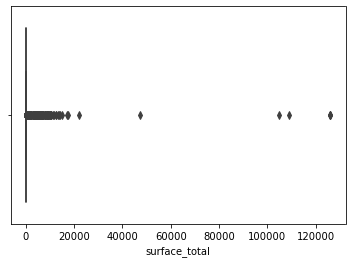

In [20]:
sns.boxplot(mascara['surface_total'])

Elijo los valores maximos y minimos para filtrar por departamento segun su superficie 

In [21]:
mayores= mascara['surface_total'] > 150
mascara = mascara[~mayores]
menores = mascara['surface_total'] < 15
mascara = mascara[~menores]
print(mascara.shape)
print((mascara.notna()).shape)

(79601, 19)
(79601, 19)


Hago el mismo boxplot pero los valores filtrados 

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_total'>

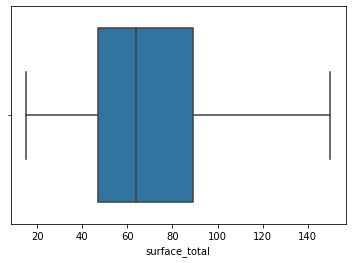

In [22]:
sns.boxplot(mascara['surface_total'])

Miro las variables estasdisticas y analizo si hubo una mejora 

In [23]:
print(mascara.describe())

                lat           lon         rooms      bedrooms     bathrooms  \
count  75977.000000  75963.000000  79601.000000  79601.000000  77546.000000   
mean     -34.599189    -58.436685      2.687579      1.747428      1.386648   
std        0.023563      0.035547      1.026162      0.884221      0.654088   
min      -34.696419    -58.530467      1.000000      0.000000      1.000000   
25%      -34.613715    -58.459700      2.000000      1.000000      1.000000   
50%      -34.599900    -58.434263      3.000000      2.000000      1.000000   
75%      -34.584907    -58.411980      3.000000      2.000000      2.000000   
max      -34.535818    -58.353930     21.000000     15.000000     14.000000   

       surface_total  surface_covered         price  
count   70684.000000     70437.000000  7.960100e+04  
mean       70.564017        65.831296  1.949822e+05  
std        30.238823       139.268860  1.725394e+05  
min        15.000000         1.000000  7.500000e+03  
25%        47.0000

Se ve como los valores atipicos arruinan las medidas de nuestro dataset. Ahora procedere a eliminar las instancias que carecen de logica.

In [24]:
mayores = mascara['surface_total'] >= mascara['surface_covered']
mayores.sum()
mascara = mascara[mayores]
mascara.shape

(69620, 19)

Vuelvo con las mediciones estadisticas

In [25]:
print(mascara.describe())

                lat           lon         rooms      bedrooms     bathrooms  \
count  66279.000000  66279.000000  69620.000000  69620.000000  68897.000000   
mean     -34.598390    -58.435505      2.703347      1.767811      1.362817   
std        0.022904      0.034879      0.985293      0.835203      0.615348   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.611812    -58.457405      2.000000      1.000000      1.000000   
50%      -34.599074    -58.433189      3.000000      2.000000      1.000000   
75%      -34.584909    -58.411767      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930     21.000000     15.000000     14.000000   

       surface_total  surface_covered         price  
count   69620.000000     69620.000000  6.962000e+04  
mean       70.693809        63.249325  1.938945e+05  
std        30.219069        26.955239  1.695646e+05  
min        15.000000         1.000000  7.500000e+03  
25%        47.0000

Ahora arranco con la variable de precios 

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

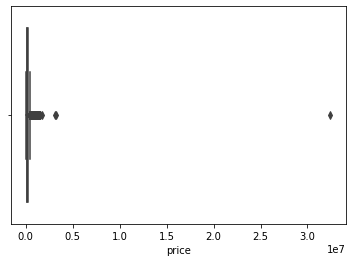

In [26]:
sns.boxplot(mascara['price'])

Le aplico un filtro segun el boxplot

In [27]:
maximos = mascara['price'] > 370000
mascara = mascara[~maximos]
mascara.shape

(64966, 19)

Realizo el mismo boxplot e histogramas para ver como vario la informacion

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

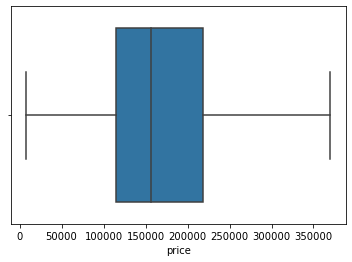

In [28]:
sns.boxplot(mascara['price'])

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

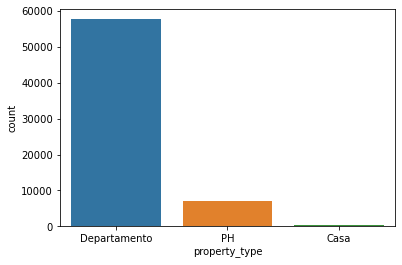

In [29]:
sns.countplot(mascara['property_type'])

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


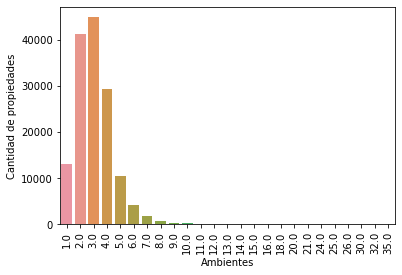

In [30]:
sns.countplot(mascara['rooms'])
grafico = sns.countplot(data = df, x = 'rooms')
grafico.set_xlabel("Ambientes")
grafico.set_ylabel("Cantidad de propiedades")
grafico.set_xticklabels(grafico.get_xticklabels(), rotation = 90);

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


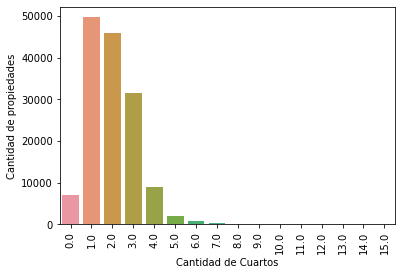

In [31]:
sns.countplot(mascara['bedrooms'])
grafico1 = sns.countplot(data = df, x = 'bedrooms')
grafico1.set_xlabel("Cantidad de Cuartos")
grafico1.set_ylabel("Cantidad de propiedades")
grafico1.set_xticklabels(grafico1.get_xticklabels(), rotation = 90);

C:\Users\Santiago\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface_total'>

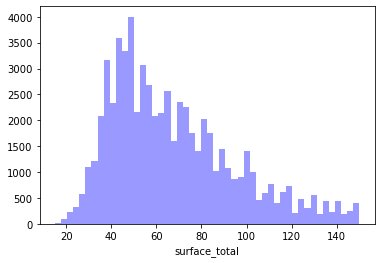

In [32]:
sns.distplot(mascara['surface_total'], kde = False, color = 'b')

<AxesSubplot:xlabel='surface_covered'>

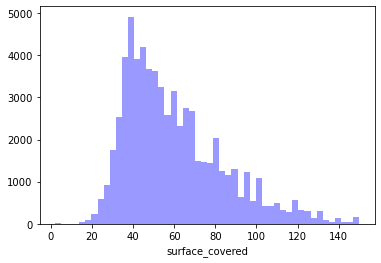

In [33]:
sns.distplot(mascara['surface_covered'], kde = False, color = 'b')

<AxesSubplot:xlabel='price'>

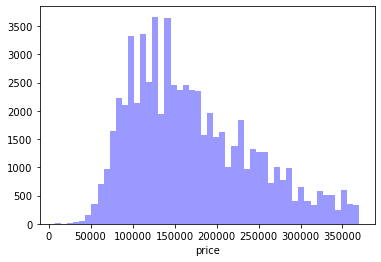

In [34]:
sns.distplot(mascara['price'], kde = False, color = 'b')

Se puede ver como  las variables tienen una pequeña tendencia a la izquierda.

Ahora que se corrijio los problemas del dataset, realizo el pairplot para las variables relevantes y analizo:

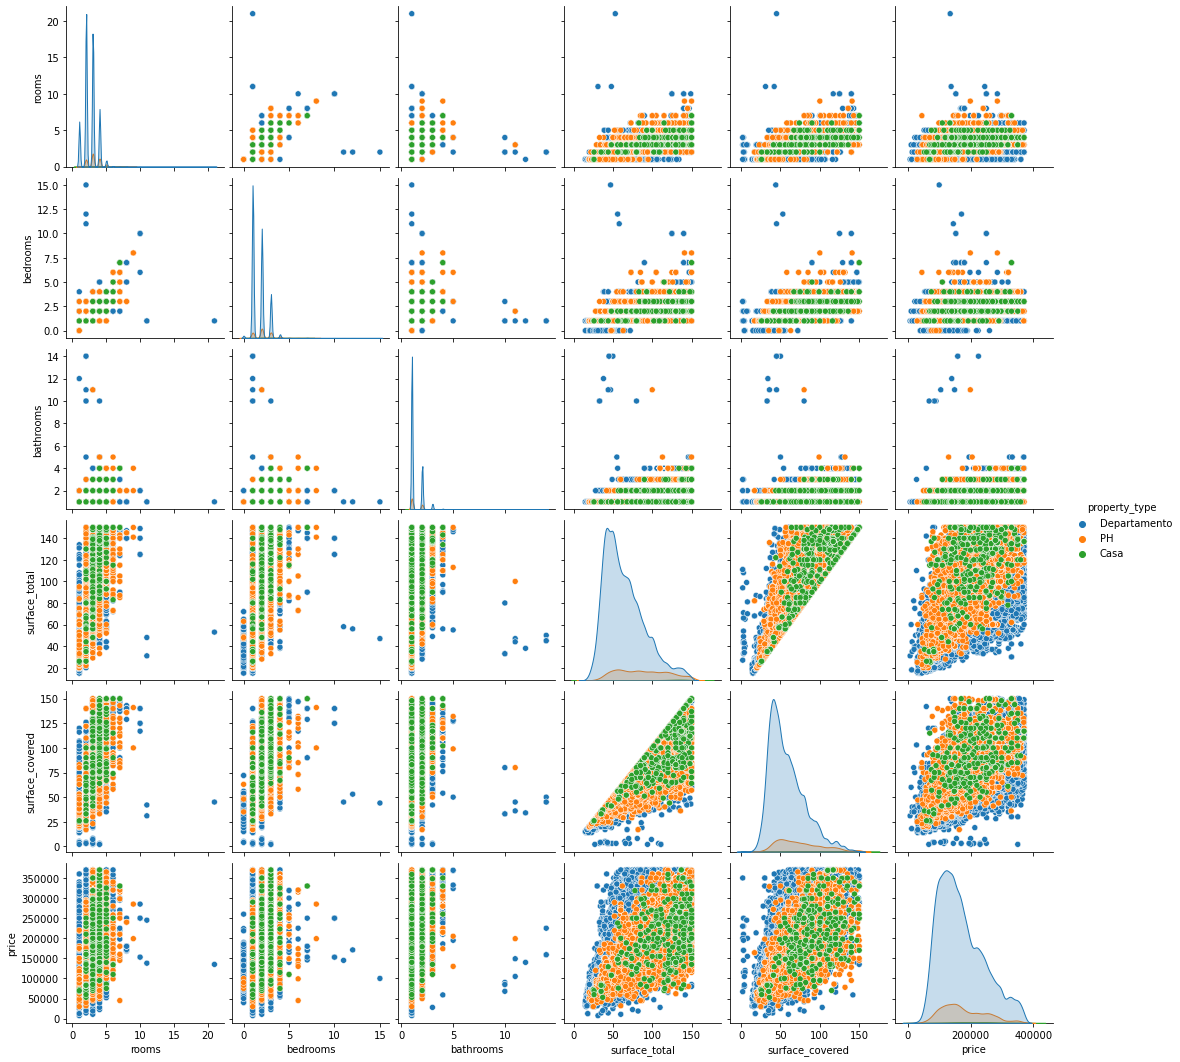

In [35]:
sns.pairplot(mascara[['property_type','rooms','bedrooms','bathrooms','surface_total','surface_covered','price']],
             hue = 'property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [36]:
mascara[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.926065,0.461440,0.752829,0.799091,0.563976
bedrooms,0.926065,1.000000,0.467859,0.737491,0.790042,0.542285
bathrooms,0.461440,0.467859,1.000000,0.530198,0.554415,0.530339
surface_total,0.752829,0.737491,0.530198,1.000000,0.922115,0.723172
surface_covered,0.799091,0.790042,0.554415,0.922115,1.000000,0.721477
price,0.563976,0.542285,0.530339,0.723172,0.721477,1.000000


Si uso heatmap puedo ver mas claro las relaciones de estas variables

<AxesSubplot:>

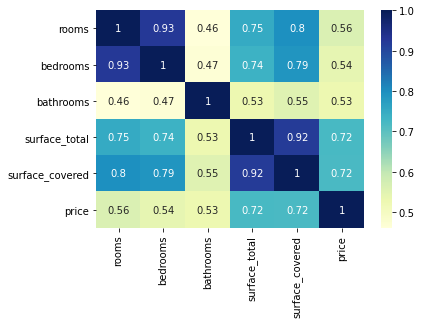

In [37]:
sns.heatmap(mascara[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(), 
            cmap="YlGnBu", annot = True)

Ahora para hacerlo mas claro lo que tengo que hacer es separarlo por tipo de propiedad.

In [38]:
departamentos = mascara.loc[df['property_type'] == 'Departamento']
ph = mascara.loc[df['property_type'] == 'PH']
casa = mascara.loc[df['property_type'] == 'Casa']

<AxesSubplot:>

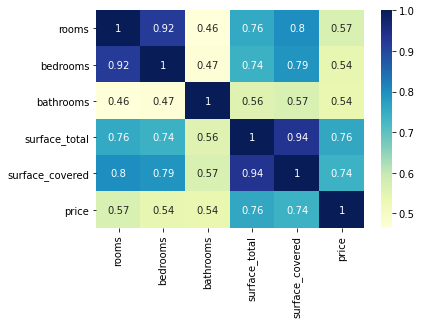

In [39]:
sns.heatmap(departamentos[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(), 
            cmap="YlGnBu", annot = True)

A partir de este graficos, podemos decir que la mayor correlacion dentro de la categoria de los Departamentos es la de la Superficie cubierta y Superficie total, con una correlacionde del % 0.94, la cual es la mayor que en los otros tipos de propiedades.

<AxesSubplot:>

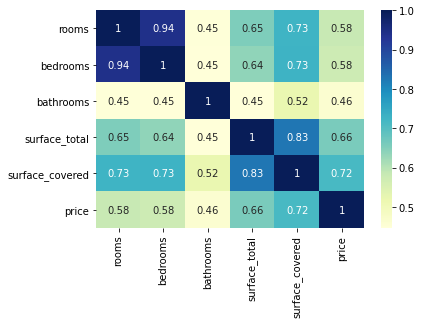

In [40]:
sns.heatmap(ph[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(), 
            cmap="YlGnBu", annot = True)

Aca se puede ver que en los PH disminuye considerablemente la correcion de superficie cubierta y total. incluyendo tambien la de cuertos y baños

<AxesSubplot:>

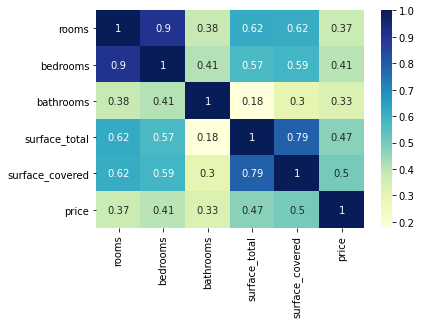

In [41]:
sns.heatmap(casa[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(), 
            cmap="YlGnBu", annot = True)

Viendo como cambia esta matriz de correlación con respecto a las otras se puede apreciar que la correlación entre los baños y la cobertura de superficies cae abruptamente a 0.18. Además, caen las correlaciones entre el precio y las cuartos y baños.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Para averiguar cual es el barrio mas cara de Buenos Aires utilizare la funcion catplot, para asi ver la relacion entre la variable categorica de barrios y la continua de Precios.
En este grafico se puede ver que Puerto madero, es la que sobresale con sus precios mas altos que el resto de los barrios.

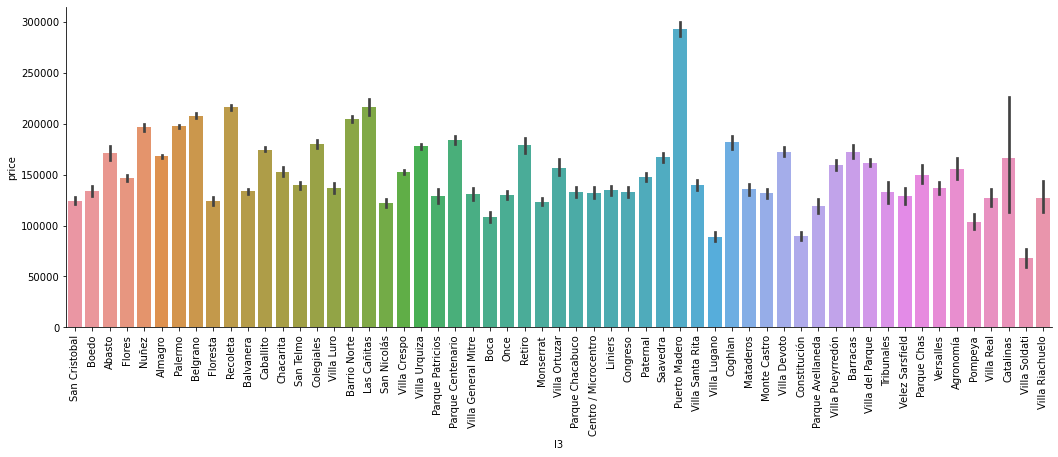

In [42]:
cat = sns.catplot(data = mascara, x ='l3', y = 'price', kind ='bar',height = 5, aspect = 3 )
cat.set_xticklabels(rotation = 90)

En esta parte del desafio, utilizare el boxplot para poder observar como esta compuesta la distribucion de los barrios en CABA. Por ejemplo, podemos ver que los minimos precios de Puerto Madero estan a la misma altura los maximos de Mataderos.

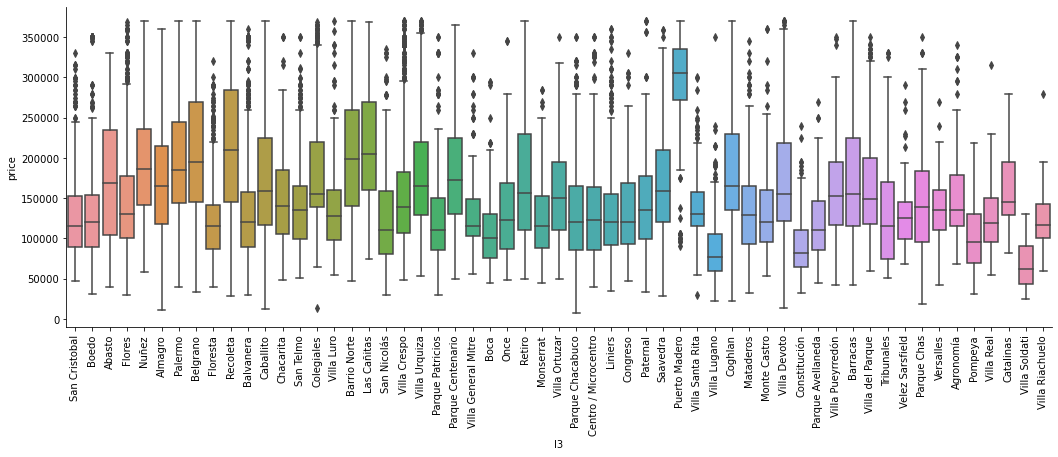

In [43]:
filtro = mascara['price'] < 2500000
filtro = mascara[filtro]
cat = sns.catplot(data = filtro, x = 'l3', y = 'price', kind='box', height = 5, aspect = 3)
cat.set_xticklabels(rotation = 90)

Para poder corroborar que Puerto Madero es el barrio mas caro, hacemos un violin plot para ver la distribucion de la variables de manera distinta que los otros graficos. Y pudimos ver que sigue siendo el barrio  mas caro por lejos.

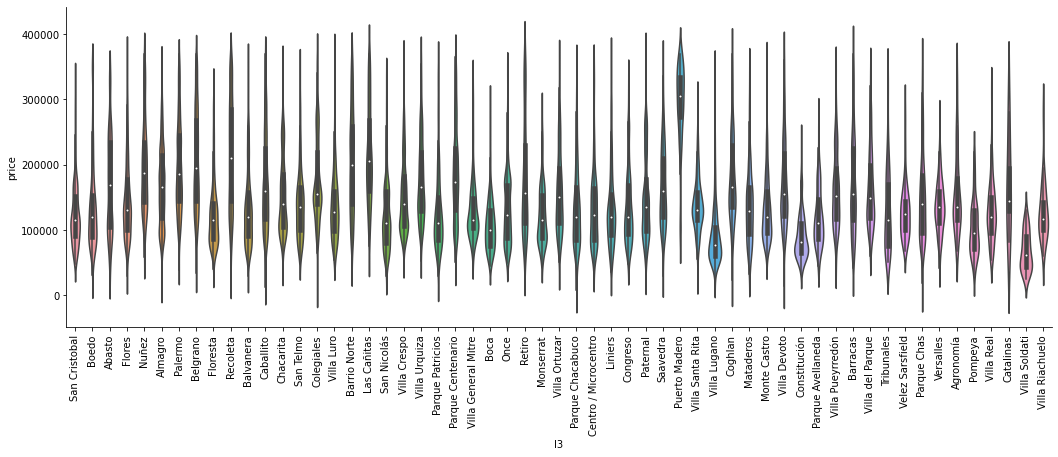

In [44]:
cat = sns.catplot(data = filtro, x = 'l3', y = 'price', kind='violin', height = 5, aspect = 3)
cat.set_xticklabels(rotation = 90)

Prosigo haciendo un breve analisis de Puerto Madero

In [45]:
madero = mascara.l3 == 'Puerto Madero'
madero = mascara[madero]


Puerto Madero cuenta con un precio promedio de aproximadamente 300.000 USD con un desvio estandar de los 60.000 USD. 

In [46]:
madero.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,214.000000,214.000000,271.000000,271.000000,269.000000,271.000000,271.000000,271.000000
mean,-34.614855,-58.365919,1.940959,1.184502,1.405204,60.420664,56.354244,293028.306273
std,0.005759,0.017258,0.712469,0.416222,0.514102,15.455078,13.862285,62219.158533
min,-34.624782,-58.469540,1.000000,0.000000,1.000000,27.000000,24.000000,89999.000000
25%,-34.617384,-58.363549,1.000000,1.000000,1.000000,51.000000,48.000000,272500.000000
50%,-34.615682,-58.362754,2.000000,1.000000,1.000000,60.000000,57.000000,305001.000000
75%,-34.615027,-58.361489,2.000000,1.000000,2.000000,69.000000,65.000000,335000.000000
max,-34.582789,-58.359396,5.000000,3.000000,4.000000,140.000000,119.000000,370000.000000


Por ultimo, con el histograma podemos ver hacia donde tienden los precios de las propiedades de Puerto Madero, siendo el mismo hacia las izquierda.

<AxesSubplot:>

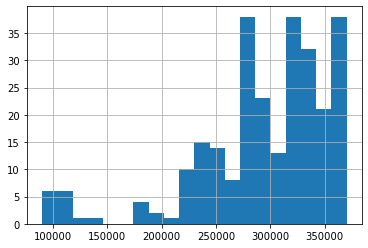

In [47]:
madero['price'].hist(bins = 20)

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

Se cargará de nuevo el dataset y se le aplicará el filtrado de datos solicitado por la consigna, en este caso, se filtrará para que quede solamente las instancias de:

Departamentos.
PH.
Casa.

In [48]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
mascara = data.l2 == 'Capital Federal'
mascara = data[mascara]
mascara1 = mascara['property_type'] == 'Departamento'
mascara1 = mascara[mascara1]
mascara2 = mascara['property_type'] == 'PH'
mascara2 = mascara[mascara2]
mascara3 = mascara['property_type'] == 'Casa'
mascara3 = mascara[mascara3]
mascara1 = mascara1.append(mascara2)
mascara1 = mascara1.append(mascara3)
dataset = mascara1

En la siguiente celda se aplicara el filtro para eliminar: 
1. Superficies menor a 1000 m2 y mayor a 15 m2.
1. Valor mayores a 400.000 USD
1. Valores faltantes

In [49]:
mask1 = dataset.surface_total <= 1000
mask2 = dataset.surface_total >= 15
mask3 = dataset.price <= 4000000
dataset = dataset[mask1]
dataset = dataset[mask2]
dataset = dataset[mask3]
dataset = dataset[['rooms', 'bedrooms', 'bathrooms', 
                   'surface_total', 'surface_covered', 'price']]
dataset = dataset.dropna()

<ipython-input-49-fbb85abbaf73>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset = dataset[mask2]
<ipython-input-49-fbb85abbaf73>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset = dataset[mask3]


In [50]:
print(dataset.shape)

(81019, 6)


# Metricas de Evaluación
Para evaluar los 3 tipos de modelos que propusimos en el trabajo, necesitamos las metricas de evalucion que nos ver el desempeño en numeros. Como tenemos un problema de Machine Learning de regresion, la metrica que yo uso para evaluar el modelo es el RMSE(Error Cuadratico Medio) ya que muestra la diferencia que hay entre ambos valores de manera intuitiva, gracias a el mismo se puede llegar a la conclusion sobre el desempeño del modelo con mayor rapidez y eficacia. Ademas deeso, tenemos que tener en cuenta que gracias a las consignas provistas por el trabajo, se elimino la mayoria de los valores atipicos, que pueden afectar el desempeño del modelo.

Tambien utilize para medir el desempeño del modelo otras metricas:
* Error cuadratico medio
* R2 score

Sin embargo la que mas peso tiene en este proyecto es el Error Cuadratico Medio.

# Clase que genera los modelos de Machine Learning
Para poder trabajar con entrenar los modelos de machine learning de regresión propuestos en la consigna, decidí crear una clase en Python que tenga como atributos los features a utilizar para entrenar al modelo:

* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered

Y como target el feature:

* price.

Además, a la clase se le agrega el tipo de modelo de regresión que se desea entrenar, hay 3 opciones:

* Benchmark
* Árbol
* Vecinos

a esta clase fue llamada bajo en nombre "Modelo", y aparte de los atribudos mencionados anteriormente, posee ciertos métodos que pertinen entrenar el modelo y mostrar sus resultados. Los métodos son los siguientes:

def ***seleccionarPartición***(self, particion, mezcla, estado): Con el argumento partición, es posible dividir el dataset con el que trabaja en particiones. Debe recibir una variable tipo "float" cuyo valor va de 0 a 1 y no acepta otros valores. Con el argumento mezcla se puede setear si se desea mezclar o no los datos al particionarlos. Y por último, con el argumento estado se modifica el "random_state" para la mezcla de los datos. Estos 2 últimos argumentos se agregaron a la clase con el propósito de garantizar que todos los modelos puedan entrenarse con los mismos datos.

def ***entrenar***(self, hiperparametro): Con el argumento hiperparámetro, es posible seleccionar tanto la profundidad máxima del árbol, como la cantidad de vecinos con la que trabajará el modelo de machine learning. En el caso de que se haya elegido como modelo al Benchmark, el hiperparámetro debe ser igual a 0, y los resultados de las predicciones devueltos tanto para el test, como para el entrenamiento es la media de la columna precios.

def ***mostrarResultadosGraficos***(self): Permite mostrar el desempeño del modelo entrenado, muestra un gráfico que ilustra el valor de los valores reales con etiquetas y los valores predichos. Además, se muestran ciertas métricas de evaluación como:

* Error Cuadrático Medio.
* Raíz Cuadrada del Error Cuadrático Medio.
* R² score.

def ***evaluarHiperparametros***(self, inicio, fin, paso): Con este método de clase, es posible realizar una evaluación del modelo creado cambiando el hiperparámetro ya sea la profundidad del árbol o la cantidad de vecinos. Con el argumento inicio se elige el hiperparámetro a evaluar inicial, con fin se elige el último hiperparámetro a evaluar, y con paso, se elige el salto del valor de hiperparámetro con el que se dirige desde el inicio al fin. Una vez seleccionados los argumentos, se muestra el desempeño de los modelos de manera gráfica tanto con los datos de train como los de test. Las métricas utilizadas son:

* Error Cuadrático Medio.
* Raíz Cuadrada del Error Cuadrático Medio.
* R² score.

In [51]:
class Modelo:
    
    def __init__(self, X, y, tipo_de_modelo):
        
        self.X = X
        self.y = y
        self.tipo_de_modelo = tipo_de_modelo
        
    def seleccionarParticion(self, particion, mezcla, estado):
        
        if particion > 1:
            return print('La partición de datos no puede ser superior al 100%')
        elif particion < 0:
            return print('La partición de datos no puede ser inferior al 0%')
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.X, 
                                                                self.y, 
                                                                test_size = particion, 
                                                                shuffle = mezcla, 
                                                                random_state = estado)
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test
            self.particion = particion
        
    def entrenar(self, hiperparametro):
        
        if self.tipo_de_modelo == 'Arbol':
            self.modelo = DecisionTreeRegressor(max_depth = hiperparametro)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.tipo_de_modelo == 'Vecinos':
            self.modelo = KNeighborsRegressor(n_neighbors = hiperparametro, weights = 'distance')
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.tipo_de_modelo == 'Benchmark' and hiperparametro == 0:
              self.y_train_pred = np.full(self.y_train.shape, dataset['price'].mean())
              self.y_test_pred = np.full(self.y_test.shape, dataset['price'].mean())
        else:
            print('No se eligió un modelo apropiado para entrenar')
            return None
        
        self.mse_train = mean_squared_error(self.y_train, self.y_train_pred)
        self.mse_test = mean_squared_error(self.y_test, self.y_test_pred)
        self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
        self.r2_train = r2_score(self.y_train, self.y_train_pred)
        self.r2_test = r2_score(self.y_test, self.y_test_pred)
    
    def mostrarResultadosGraficos(self):
        print('Las métricas de desempeño del modelo con los datos de entrenamiento son:')
        print('El error medio absoluto: ' + str(self.mse_train))
        print('La raíz cuadrada del error medio absoluto: ' + str(self.rmse_train))
        print('R2 Score: ' + str(self.r2_train))
        print()
        print('Las métricas de desempeño del modelo con los datos de test son:')
        print('El error medio absoluto: ' + str(self.mse_test))
        print('La raíz cuadrada del error medio absoluto: ' + str(self.rmse_test))
        print('R2 Score: ' + str(self.r2_test))
        plt.figure(figsize = (8,4))
        ax = plt.subplot(1,2,1)
        ax.scatter(self.y_train, self.y_train_pred, s = 2)
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
        ax.plot(lims, lims, 'r-', alpha=0.75, zorder = 0)
        plt.title('Valores de entrenamiento originales y predichos por el modelo /n')
        plt.xticks(rotation=45)
        plt.xlabel('y (train)')
        plt.ylabel('y_pred (train)')
        plt.tight_layout()
        plt.show()
        ax = plt.subplot(1,2,2)
        plt.title('Valores de test originales y predichos por el modelo')
        ax.scatter(self.y_test, self.y_test_pred, s = 2)
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
        ax.plot(lims, lims, 'r-', alpha = 0.75, zorder = 0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    def evaluarHiperparametros(self, inicio, fin, paso):
        lista_mse_train = []
        lista_mse_test = []
        lista_rmse_train = []
        lista_rmse_test = []
        lista_r2_train = []
        lista_r2_test = []
        self.hiperparametros = np.arange(inicio, fin, paso)
        for k in self.hiperparametros:
            if self.tipo_de_modelo == 'Arbol':
                clf = DecisionTreeRegressor(max_depth = k)
                self.etiqueta = 'Profundidad' 
            elif self.tipo_de_modelo == 'Vecinos':
                clf = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
                self.etiqueta = 'Vecinos'
            else:
                print('No se eligió un modelo apropiado para entrenar')
                return None
            clf.fit(self.X_train, self.y_train)
            self.y_train_pred = clf.predict(self.X_train)
            self.mse_train = mean_squared_error(self.y_train, self.y_train_pred)
            self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
            self.r2_train = r2_score(self.y_train, self.y_train_pred)
            self.y_test_pred = clf.predict(self.X_test)
            self.mse_test = mean_squared_error(self.y_test, self.y_test_pred)
            self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
            self.r2_test = r2_score(self.y_test, self.y_test_pred)
            lista_rmse_train.append(self.rmse_train)
            lista_rmse_test.append(self.rmse_test)
            lista_mse_train.append(self.mse_train)
            lista_mse_test.append(self.mse_test)
            lista_r2_train.append(self.r2_train)
            lista_r2_test.append(self.r2_test)
        plt.plot(self.hiperparametros, lista_mse_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_mse_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('Error Cuadrático Medio')
        plt.show()
        
        plt.plot(self.hiperparametros, lista_rmse_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_rmse_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('Raíz Cuadrada de Error Cuadrático Medio')
        plt.show()
        
        plt.plot(self.hiperparametros, lista_r2_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_r2_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('R2 Score')
        plt.show()          

***Construccion del modelo Benchmark***


Para poder realizar el modelo bechmark, se opto por tomer la media de los precios y crear un arreglo de numpy que posea el mismo tamaño que la columna de precio del dataset. Cada valor que pertenece a cada fila de la columna seria el mismo que el del promedio de los precios obtenidos por el dataset:

In [52]:
Bechmark = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']],
                 dataset['price'], 'Benchmark')

Hacemos la divisoin de los datos de entrenamiento(%70) y los datos de testeo(%30)


In [53]:
Bechmark.seleccionarParticion(particion = 0.3, mezcla = True , estado = 15)

In [54]:
Bechmark.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [55]:
Bechmark.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Coloco un hiperparametro 0 para poder usar Bechmark

In [56]:
Bechmark.entrenar(0)

Una vez entrenado utilizo la funcion para ver las metricas de desempeño del modelo

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 90301968659.46579
La raíz cuadrada del error medio absoluto: 300502.85965272575
R2 Score: -3.1921119081346205e-09

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 87195157166.78305
La raíz cuadrada del error medio absoluto: 295288.261139489
R2 Score: -1.799787585632373e-08


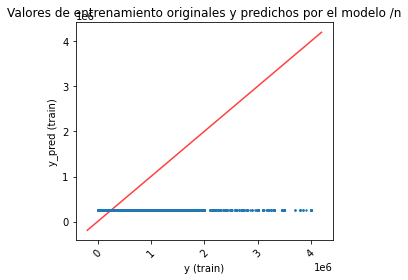

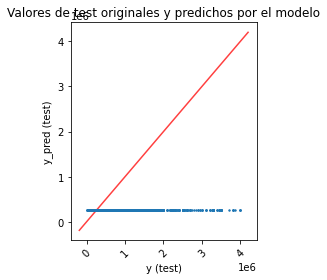

In [57]:
Bechmark.mostrarResultadosGraficos()

***Construccion de los Modelos KNN Y Árbol***

Hago el mismo procedimiento para el Arbol de decision y vencinos mas cercanos

In [58]:
Arbol_3 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']],
                 dataset['price'], 'Arbol')

In [59]:
Arbol_3.seleccionarParticion(particion = 0.3, mezcla = True , estado = 15)

In [60]:
Arbol_3.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [61]:
Arbol_3.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Elijo un profundidad maxima de 3 en el arbol

In [62]:
Arbol_3.entrenar(3)

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 36987505419.29441
La raíz cuadrada del error medio absoluto: 192321.35975833368
R2 Score: 0.590402002454179

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 36389052151.40944
La raíz cuadrada del error medio absoluto: 190759.1469665595
R2 Score: 0.5826711713274202


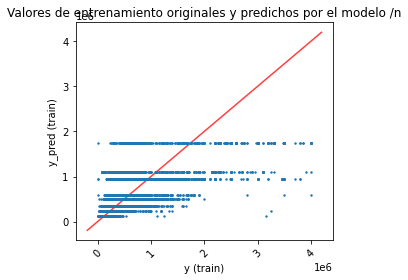

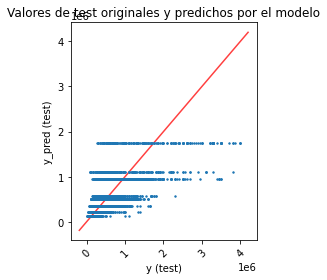

In [63]:
Arbol_3.mostrarResultadosGraficos()

In [65]:
KNN_3 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']],
                 dataset['price'], 'Vecinos')

In [66]:
KNN_3.seleccionarParticion(particion = 0.3, mezcla = True , estado = 15)

In [68]:
KNN_3.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [69]:
KNN_3.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Elijo un modelo con una cantidad de 3 vecinos

In [70]:
KNN_3.entrenar(3)

Ahora muestro los resultados:

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 4398590389.838377
La raíz cuadrada del error medio absoluto: 66321.86961959364
R2 Score: 0.951290204752163

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 18675721691.70659
La raíz cuadrada del error medio absoluto: 136659.14419352476
R2 Score: 0.7858169807285533


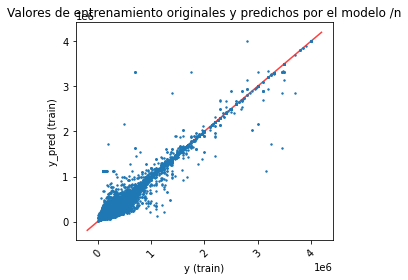

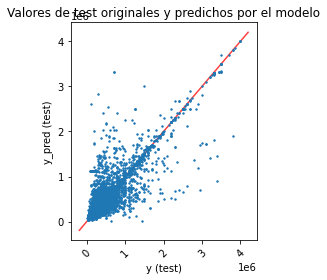

In [71]:
KNN_3.mostrarResultadosGraficos()

Por lo que se puede ver, los dos modelos estos tienen mejores resultados que el benchmark dado a que tiene un RMSE de casi de 300.000, mientras que árbol de casi 190.000 y vecinos de 66.000. 

Sin embargo, podemos realizar ajustes con el valor del hiperparametro.

Sabiendo que voy a seguir con los modelos de abroles de decision y de vecionos mas cercanos, prosigo a evaluar cuales serian los mejores hiperparametros. Para ello se grafica los errores del modelo en funcion del valor del hiperparametro del mismo.


Empezamos por Arbol de decision:



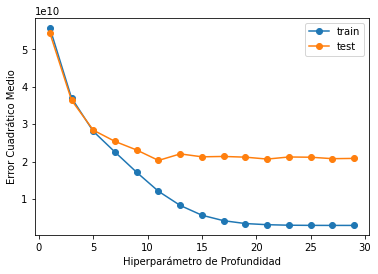

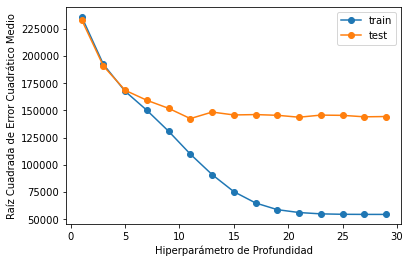

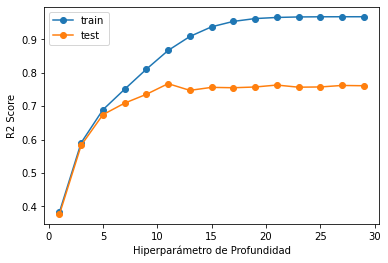

In [72]:
Arbol_3.evaluarHiperparametros(1,30,2)

Ahora por el de Vecinos mas Cercanos:

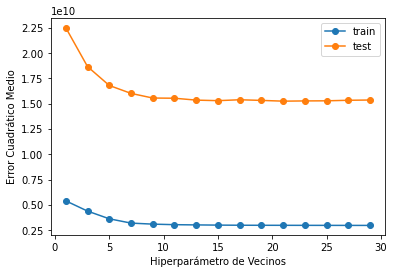

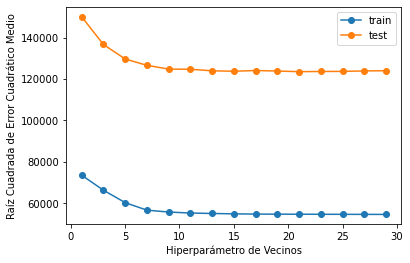

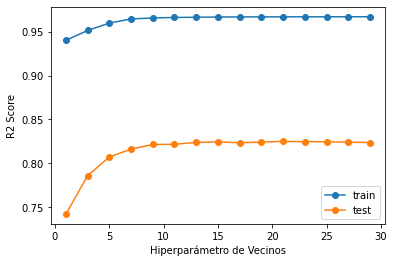

In [74]:
KNN_3.evaluarHiperparametros(1,30,2)

Por lo que se puede ver enj estos graficos, se acentua la baja del RMSE en el hiperparametro con valor en 15.

Para evitar el Overfitting, pondremos el hiperparametro en 15.

In [77]:
Arbol_15 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']],
                 dataset['price'], 'Arbol')
KNN_15 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']],
                 dataset['price'], 'Vecinos')

In [78]:
Arbol_15.seleccionarParticion(particion = 0.3, mezcla = True , estado = 15)
KNN_15.seleccionarParticion(particion = 0.3, mezcla = True , estado = 15)

In [79]:
Arbol_15.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


In [80]:
Arbol_15.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


In [81]:
Arbol_15.entrenar(15)
KNN_15.entrenar(15)

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 5688746189.126074
La raíz cuadrada del error medio absoluto: 75423.77734591442
R2 Score: 0.937003076547115

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 21218530979.213264
La raíz cuadrada del error medio absoluto: 145665.81952954255
R2 Score: 0.7566547036492419


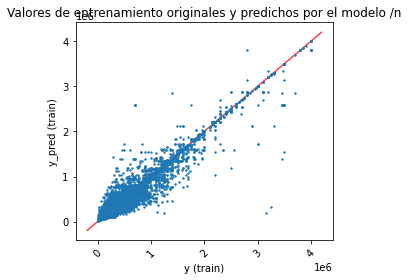

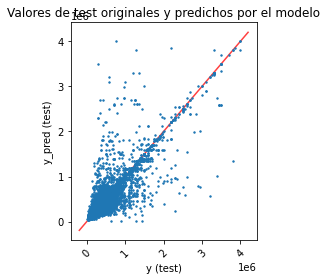

In [82]:
Arbol_15.mostrarResultadosGraficos()

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 3013952675.785652
La raíz cuadrada del error medio absoluto: 54899.477919062694
R2 Score: 0.9666236214985265

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 15309613058.781517
La raíz cuadrada del error medio absoluto: 123732.0211537075
R2 Score: 0.8244212886153932


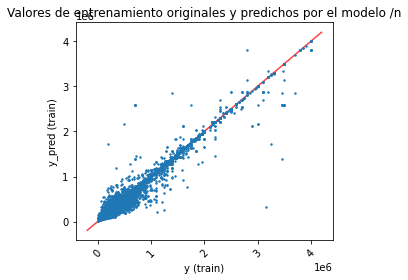

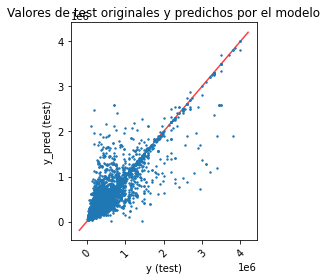

In [83]:
KNN_15.mostrarResultadosGraficos()

Utilare tablas y graficos para los errores de los modelos para asi llegar a una conclusion con mas presicion.

En el codigo de abajo se construye una tabla que muestra el desempeño de cad modelo segun las metricas de evalucion que desarrollamos antes.

In [86]:
errores= {
    'Modelos': ['Bechmark', 'Arbol 3', 'Arbol 15', 'Vecinos 3', 'Vecinos 15'],
    'MSE_TRAIN': [Bechmark.mse_train,Arbol_3.mse_train,Arbol_15.mse_train,KNN_3.mse_train,KNN_15.mse_train],
    'MSE_TEST': [Bechmark.mse_test,Arbol_3.mse_test,Arbol_15.mse_test,KNN_3.mse_test,KNN_15.mse_test],
    'RMSE_TRAIN': [Bechmark.rmse_train,Arbol_3.rmse_train,Arbol_15.rmse_train,KNN_3.rmse_train,KNN_15.rmse_train],
    'RMSE_TEST': [Bechmark.rmse_test,Arbol_3.rmse_test,Arbol_15.rmse_test,KNN_3.rmse_test,KNN_15.rmse_test],
    'R2_TRAIN': [Bechmark.r2_train,Arbol_3.r2_train,Arbol_15.r2_train,KNN_3.r2_train,KNN_15.r2_train],
    'R2_TEST': [Bechmark.r2_test,Arbol_3.r2_test,Arbol_15.r2_test,KNN_3.r2_test,KNN_15.r2_test]
}

tabla_errores = pd.DataFrame(errores, columns= ['Modelos', 'MSE_TRAIN','MSE_TEST','RMSE_TRAIN', 'RMSE_TEST','R2_TRAIN','R2_TEST'])

<AxesSubplot:xlabel='Modelos', ylabel='MSE_TRAIN'>

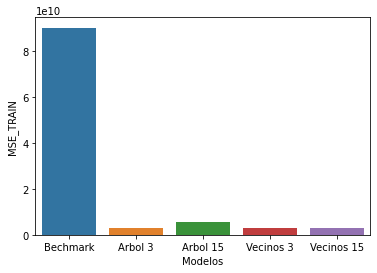

In [87]:
sns.barplot(x = 'Modelos', y = 'MSE_TRAIN', data = tabla_errores)

<AxesSubplot:xlabel='Modelos', ylabel='MSE_TEST'>

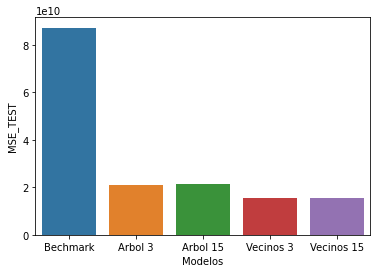

In [88]:
sns.barplot(x = 'Modelos', y = 'MSE_TEST', data = tabla_errores)

<AxesSubplot:xlabel='Modelos', ylabel='RMSE_TRAIN'>

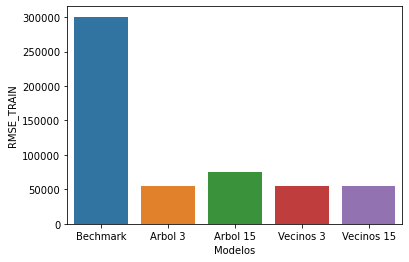

In [89]:
sns.barplot(x = 'Modelos', y = 'RMSE_TRAIN', data = tabla_errores)

<AxesSubplot:xlabel='Modelos', ylabel='MSE_TEST'>

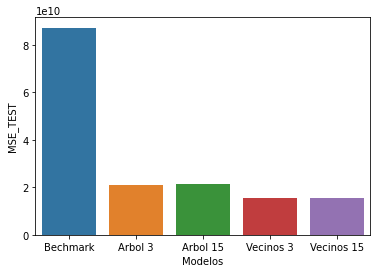

In [90]:
sns.barplot(x = 'Modelos', y = 'MSE_TEST', data = tabla_errores)

<AxesSubplot:xlabel='Modelos', ylabel='R2_TRAIN'>

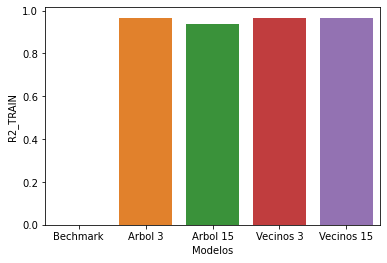

In [91]:
sns.barplot(x = 'Modelos', y = 'R2_TRAIN', data = tabla_errores)

<AxesSubplot:xlabel='Modelos', ylabel='R2_TEST'>

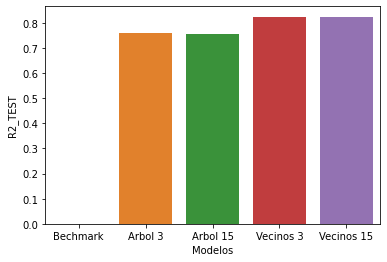

In [92]:
sns.barplot(x = 'Modelos', y = 'R2_TEST', data = tabla_errores)

En esto graficos se puede ver una mejora con el cambio de los Hiperparamos de 3 a 15

***Conclusion***
* Los modelos con el cambio de hiperparametro en 3 y 15 superan al de bechmark
* El modelo que mejor prediccion tienen es el de regresion con vecinos mas cercanos con 15 vecinos. ¿Por qué? Podemos apreciar que la dispersion de los puntos del grafico de los modelos de regresion esta mas cerca de la recta que los modelos de arboles de decision. Pero tambien es un modelo con un error demasiado alto. 
* Por ahi deberia simplicar las features y trabajar con 3 sin tanta correlacion en lugar de 6. Hay varios atributos con una correlacion muy elevada entre si que pueden perjudicar el desempeño.
* Hay mucha cantidad de datos de ciertas categorias como tipo de propiedad de departamentos  o de barrios como Palermo que generan gran peso en la BBDD.